# Imports

In [89]:
from bokeh.plotting import figure, output_file, show
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score

import yfinance as yf

from datetime import timedelta

sns.set_theme()

# Data

In [2]:
LEAN_HOGS = pd.read_csv('LEAN_HOGS.csv', parse_dates=["Date"])

In [3]:
LEAN_HOGS.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

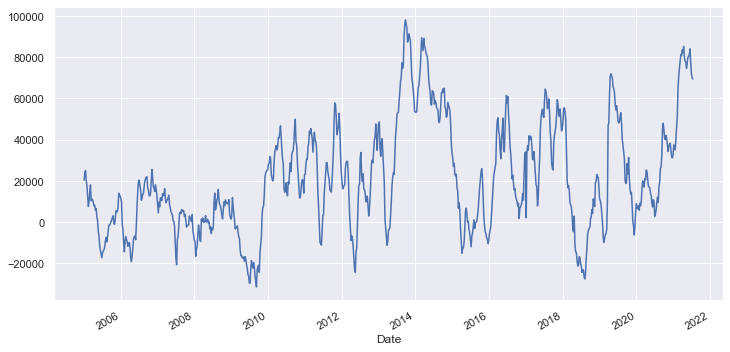

In [4]:
LEAN_HOGS['Net positions'].plot(figsize=(12,6))

### Getting target data
HE=F is the ticker for the LEAN HOGS futures
Data was downloaded from yfinance...   
  
api didn't seem to work for this particular symbol

In [5]:
HE_F = pd.read_csv('HE=F (1).csv', parse_dates=['Date'], index_col='Date')

In [6]:
LEAN_HOGS['Price'] = 0

In [7]:
for i in range(0, len(LEAN_HOGS)):
    try:
        LEAN_HOGS.iloc[i,8] = float(HE_F.loc[HE_F.index == LEAN_HOGS.index[i]]['Close'])
    except:
        LEAN_HOGS.iloc[i,8] = float(HE_F.loc[HE_F.index == LEAN_HOGS.index[i] + timedelta(days=2)]['Close'])

In [35]:
LEAN_HOGS = LEAN_HOGS.dropna()

In [36]:
LEAN_HOGS = LEAN_HOGS.drop('Symbol',axis=1)

KeyError: "['Symbol'] not found in axis"

In [13]:
LEAN_HOGS = LEAN_HOGS.reset_index()

# Predictions

## Custom test_train split

In [37]:
X = LEAN_HOGS.iloc[:,1:-1].values
y = LEAN_HOGS.iloc[:,-1].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [129]:
X_train[0]

array([ 65158,  77880,  -1315,  -3647, -12722, 143038, 214806],
      dtype=int64)

In [65]:
ann = Sequential()

In [66]:
ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=50,activation='relu'))
ann.add(Dense(units=35,activation='relu'))
ann.add(Dense(units=35,activation='relu'))

In [67]:
ann.add(Dense(units=1))

In [68]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [84]:
ann.fit(X_train, y_train, epochs=3000, batch_size=32)

Epoch 1/3000
42/42 [==============================] - 0s 730us/step - loss: 61.6250 - accuracy: 0.0000e+00
Epoch 2/3000
42/42 [==============================] - 0s 803us/step - loss: 76.2058 - accuracy: 0.0000e+00
Epoch 3/3000
42/42 [==============================] - 0s 754us/step - loss: 69.5879 - accuracy: 0.0000e+00
Epoch 4/3000
42/42 [==============================] - 0s 778us/step - loss: 96.2086 - accuracy: 0.0000e+00
Epoch 5/3000
42/42 [==============================] - 0s 754us/step - loss: 117.4917 - accuracy: 0.0000e+00
Epoch 6/3000
42/42 [==============================] - 0s 778us/step - loss: 78.0881 - accuracy: 0.0000e+00
Epoch 7/3000
42/42 [==============================] - 0s 778us/step - loss: 76.0528 - accuracy: 0.0000e+00
Epoch 8/3000
42/42 [==============================] - 0s 778us/step - loss: 70.8058 - accuracy: 0.0000e+00
Epoch 9/3000
42/42 [==============================] - 0s 778us/step - loss: 67.1671 - accuracy: 0.0000e+00
Epoch 10/3000
42/42 [===============

42/42 [==============================] - 0s 1ms/step - loss: 53.9956 - accuracy: 0.0000e+00
Epoch 78/3000
42/42 [==============================] - 0s 997us/step - loss: 58.3838 - accuracy: 0.0000e+00
Epoch 79/3000
42/42 [==============================] - 0s 1ms/step - loss: 55.6241 - accuracy: 0.0000e+00
Epoch 80/3000
42/42 [==============================] - 0s 949us/step - loss: 57.9737 - accuracy: 0.0000e+00
Epoch 81/3000
42/42 [==============================] - 0s 803us/step - loss: 56.7718 - accuracy: 0.0000e+00
Epoch 82/3000
42/42 [==============================] - 0s 778us/step - loss: 53.6311 - accuracy: 0.0000e+00
Epoch 83/3000
42/42 [==============================] - 0s 851us/step - loss: 52.8337 - accuracy: 0.0000e+00
Epoch 84/3000
42/42 [==============================] - 0s 803us/step - loss: 55.5018 - accuracy: 0.0000e+00
Epoch 85/3000
42/42 [==============================] - 0s 949us/step - loss: 57.3452 - accuracy: 0.0000e+00
Epoch 86/3000
42/42 [=========================

42/42 [==============================] - 0s 705us/step - loss: 51.6569 - accuracy: 0.0000e+00
Epoch 153/3000
42/42 [==============================] - 0s 705us/step - loss: 52.7813 - accuracy: 0.0000e+00
Epoch 154/3000
42/42 [==============================] - 0s 681us/step - loss: 52.7532 - accuracy: 0.0000e+00
Epoch 155/3000
42/42 [==============================] - 0s 778us/step - loss: 51.8596 - accuracy: 0.0000e+00
Epoch 156/3000
42/42 [==============================] - 0s 803us/step - loss: 52.8236 - accuracy: 0.0000e+00
Epoch 157/3000
42/42 [==============================] - 0s 778us/step - loss: 52.2124 - accuracy: 0.0000e+00
Epoch 158/3000
42/42 [==============================] - 0s 778us/step - loss: 52.8096 - accuracy: 0.0000e+00
Epoch 159/3000
42/42 [==============================] - 0s 705us/step - loss: 54.5517 - accuracy: 0.0000e+00
Epoch 160/3000
42/42 [==============================] - 0s 681us/step - loss: 52.8334 - accuracy: 0.0000e+00
Epoch 161/3000
42/42 [============

42/42 [==============================] - 0s 827us/step - loss: 50.2373 - accuracy: 0.0000e+00
Epoch 228/3000
42/42 [==============================] - 0s 803us/step - loss: 50.5829 - accuracy: 0.0000e+00
Epoch 229/3000
42/42 [==============================] - 0s 730us/step - loss: 53.2308 - accuracy: 0.0000e+00
Epoch 230/3000
42/42 [==============================] - 0s 730us/step - loss: 54.6916 - accuracy: 0.0000e+00
Epoch 231/3000
42/42 [==============================] - 0s 681us/step - loss: 50.5678 - accuracy: 0.0000e+00
Epoch 232/3000
42/42 [==============================] - 0s 657us/step - loss: 50.7653 - accuracy: 0.0000e+00
Epoch 233/3000
42/42 [==============================] - 0s 681us/step - loss: 52.3490 - accuracy: 0.0000e+00
Epoch 234/3000
42/42 [==============================] - 0s 681us/step - loss: 54.8707 - accuracy: 0.0000e+00
Epoch 235/3000
42/42 [==============================] - 0s 681us/step - loss: 51.7615 - accuracy: 0.0000e+00
Epoch 236/3000
42/42 [============

42/42 [==============================] - 0s 681us/step - loss: 56.9538 - accuracy: 0.0000e+00
Epoch 303/3000
42/42 [==============================] - 0s 730us/step - loss: 57.9073 - accuracy: 0.0000e+00
Epoch 304/3000
42/42 [==============================] - 0s 705us/step - loss: 56.0210 - accuracy: 0.0000e+00
Epoch 305/3000
42/42 [==============================] - 0s 681us/step - loss: 50.4642 - accuracy: 0.0000e+00
Epoch 306/3000
42/42 [==============================] - 0s 705us/step - loss: 51.4696 - accuracy: 0.0000e+00
Epoch 307/3000
42/42 [==============================] - 0s 681us/step - loss: 50.8648 - accuracy: 0.0000e+00
Epoch 308/3000
42/42 [==============================] - 0s 705us/step - loss: 51.2927 - accuracy: 0.0000e+00
Epoch 309/3000
42/42 [==============================] - 0s 730us/step - loss: 50.5006 - accuracy: 0.0000e+00
Epoch 310/3000
42/42 [==============================] - 0s 681us/step - loss: 49.7770 - accuracy: 0.0000e+00
Epoch 311/3000
42/42 [============

42/42 [==============================] - 0s 705us/step - loss: 50.3385 - accuracy: 0.0000e+00
Epoch 378/3000
42/42 [==============================] - 0s 730us/step - loss: 48.9795 - accuracy: 0.0000e+00
Epoch 379/3000
42/42 [==============================] - 0s 681us/step - loss: 48.8239 - accuracy: 0.0000e+00
Epoch 380/3000
42/42 [==============================] - 0s 681us/step - loss: 49.9866 - accuracy: 0.0000e+00
Epoch 381/3000
42/42 [==============================] - 0s 705us/step - loss: 93.4759 - accuracy: 0.0000e+00
Epoch 382/3000
42/42 [==============================] - 0s 705us/step - loss: 79.1907 - accuracy: 0.0000e+00
Epoch 383/3000
42/42 [==============================] - 0s 681us/step - loss: 68.0484 - accuracy: 0.0000e+00
Epoch 384/3000
42/42 [==============================] - 0s 681us/step - loss: 61.0531 - accuracy: 0.0000e+00
Epoch 385/3000
42/42 [==============================] - 0s 705us/step - loss: 58.5084 - accuracy: 0.0000e+00
Epoch 386/3000
42/42 [============

42/42 [==============================] - 0s 705us/step - loss: 48.0129 - accuracy: 0.0000e+00
Epoch 453/3000
42/42 [==============================] - 0s 705us/step - loss: 49.7981 - accuracy: 0.0000e+00
Epoch 454/3000
42/42 [==============================] - 0s 730us/step - loss: 49.7015 - accuracy: 0.0000e+00
Epoch 455/3000
42/42 [==============================] - 0s 705us/step - loss: 53.8732 - accuracy: 0.0000e+00
Epoch 456/3000
42/42 [==============================] - 0s 681us/step - loss: 61.3925 - accuracy: 0.0000e+00
Epoch 457/3000
42/42 [==============================] - 0s 705us/step - loss: 51.0939 - accuracy: 0.0000e+00
Epoch 458/3000
42/42 [==============================] - 0s 681us/step - loss: 55.9930 - accuracy: 0.0000e+00
Epoch 459/3000
42/42 [==============================] - 0s 681us/step - loss: 56.6468 - accuracy: 0.0000e+00
Epoch 460/3000
42/42 [==============================] - 0s 705us/step - loss: 52.6891 - accuracy: 0.0000e+00
Epoch 461/3000
42/42 [============

42/42 [==============================] - 0s 657us/step - loss: 53.7112 - accuracy: 0.0000e+00
Epoch 528/3000
42/42 [==============================] - 0s 705us/step - loss: 53.7425 - accuracy: 0.0000e+00
Epoch 529/3000
42/42 [==============================] - 0s 657us/step - loss: 59.4141 - accuracy: 0.0000e+00
Epoch 530/3000
42/42 [==============================] - 0s 705us/step - loss: 56.8677 - accuracy: 0.0000e+00
Epoch 531/3000
42/42 [==============================] - 0s 681us/step - loss: 53.4257 - accuracy: 0.0000e+00
Epoch 532/3000
42/42 [==============================] - 0s 705us/step - loss: 53.0597 - accuracy: 0.0000e+00
Epoch 533/3000
42/42 [==============================] - 0s 657us/step - loss: 53.2119 - accuracy: 0.0000e+00
Epoch 534/3000
42/42 [==============================] - 0s 705us/step - loss: 51.5423 - accuracy: 0.0000e+00
Epoch 535/3000
42/42 [==============================] - 0s 705us/step - loss: 49.3605 - accuracy: 0.0000e+00
Epoch 536/3000
42/42 [============

42/42 [==============================] - 0s 705us/step - loss: 72.4543 - accuracy: 0.0000e+00
Epoch 603/3000
42/42 [==============================] - 0s 705us/step - loss: 80.5171 - accuracy: 0.0000e+00
Epoch 604/3000
42/42 [==============================] - 0s 705us/step - loss: 67.1553 - accuracy: 0.0000e+00
Epoch 605/3000
42/42 [==============================] - 0s 681us/step - loss: 65.2276 - accuracy: 0.0000e+00
Epoch 606/3000
42/42 [==============================] - 0s 681us/step - loss: 62.0062 - accuracy: 0.0000e+00
Epoch 607/3000
42/42 [==============================] - 0s 681us/step - loss: 64.4348 - accuracy: 0.0000e+00
Epoch 608/3000
42/42 [==============================] - 0s 705us/step - loss: 57.9924 - accuracy: 0.0000e+00
Epoch 609/3000
42/42 [==============================] - ETA: 0s - loss: 51.8894 - accuracy: 0.0000e+0 - 0s 681us/step - loss: 56.3331 - accuracy: 0.0000e+00
Epoch 610/3000
42/42 [==============================] - 0s 681us/step - loss: 57.9930 - accurac

42/42 [==============================] - 0s 657us/step - loss: 48.8156 - accuracy: 0.0000e+00
Epoch 677/3000
42/42 [==============================] - 0s 730us/step - loss: 47.6938 - accuracy: 0.0000e+00
Epoch 678/3000
42/42 [==============================] - 0s 705us/step - loss: 46.9757 - accuracy: 0.0000e+00
Epoch 679/3000
42/42 [==============================] - 0s 705us/step - loss: 48.6935 - accuracy: 0.0000e+00
Epoch 680/3000
42/42 [==============================] - 0s 730us/step - loss: 46.9664 - accuracy: 0.0000e+00
Epoch 681/3000
42/42 [==============================] - 0s 681us/step - loss: 49.7321 - accuracy: 0.0000e+00
Epoch 682/3000
42/42 [==============================] - 0s 705us/step - loss: 55.3351 - accuracy: 0.0000e+00
Epoch 683/3000
42/42 [==============================] - 0s 705us/step - loss: 47.8067 - accuracy: 0.0000e+00
Epoch 684/3000
42/42 [==============================] - 0s 827us/step - loss: 50.0756 - accuracy: 0.0000e+00
Epoch 685/3000
42/42 [============

KeyboardInterrupt: 

In [85]:
y_pred = ann.predict(X_test)

In [86]:
y_pred

array([[ 78.1976  ],
       [ 58.251884],
       [ 65.158356],
       [ 58.015263],
       [ 77.45667 ],
       [ 81.538185],
       [ 62.382965],
       [ 59.66019 ],
       [ 76.84233 ],
       [ 82.28111 ],
       [ 63.567528],
       [ 58.306892],
       [ 66.27354 ],
       [ 68.475174],
       [108.69093 ],
       [ 68.62455 ],
       [ 91.867935],
       [ 81.33262 ],
       [ 76.02988 ],
       [ 82.64288 ],
       [ 62.385372],
       [ 59.486454],
       [ 73.211105],
       [ 61.19123 ],
       [ 71.24234 ],
       [ 76.90291 ],
       [ 68.13748 ],
       [ 64.45451 ],
       [106.92786 ],
       [ 81.074814],
       [110.125175],
       [ 83.87784 ],
       [ 83.43195 ],
       [ 59.89275 ],
       [ 74.67395 ],
       [ 62.118996],
       [ 73.77378 ],
       [ 56.974476],
       [ 57.579338],
       [ 73.99834 ],
       [ 61.887276],
       [ 63.968536],
       [ 65.50369 ],
       [ 58.268524],
       [ 68.41209 ],
       [ 57.1339  ],
       [ 66.990135],
       [ 85.1

In [87]:
print(r2_score(y_test,y_pred))

0.6143134498469207


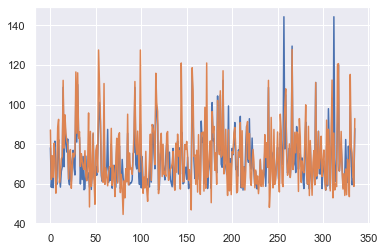

In [88]:
plt.plot(np.arange(0, len(X_test), 1), y_pred)
plt.plot(np.arange(0, len(X_test), 1), y_test)

In [109]:
graph = figure(height=800, width=1900, title="ANN regression",x_axis_label = '#',y_axis_label = 'price')
graph.line(np.arange(0, len(X_test), 1),y_pred_2,color="red",line_width=1,legend_label="Predicted")
graph.line(np.arange(0, len(X_test), 1),y_test,color="blue",line_width=1,legend_label="Actual")
show(graph)

In [105]:
y_pred_2 = []

In [106]:
for element in y_pred:
    y_pred_2.append(element)

In [119]:
list(LEAN_HOGS.iloc[0])[1:]

[107080, 37609, 2709, 3284, 69471, 144689, 262084, 112.25]

In [135]:
ann.predict(np.array([[ 118725,  45000,  -2936,  1427, 118725-45000, 118725+45000,  266765]], dtype='int64'))

array([[116.25469]], dtype=float32)

In [134]:
LEAN_HOGS.columns

Index(['Date', 'Long', 'Short', 'Change Long', 'Change Short', 'Net positions',
       'Total positions', 'Open interest', 'Price'],
      dtype='object')

In [131]:
np.array([ 65158,  77880,  -1315,  -3647, -12722, 143038, 214806], dtype='int64')

array([ 65158,  77880,  -1315,  -3647, -12722, 143038, 214806],
      dtype=int64)

In [143]:
ann.predict(np.array([LEAN_HOGS.iloc[0][1:-1].values],dtype='int64'))

array([[108.69096]], dtype=float32)

In [140]:
LEAN_HOGS

,Date,Long,Short,Change Long,Change Short,Net positions,Total positions,Open interest,Price
0,2021-07-13,107080,37609,2709,3284,69471,144689,262084,112.250000
1,2021-07-06,104371,34325,-4211,-2558,70046,138696,264471,109.925003
2,2021-06-01,120882,40587,3723,3403,80295,161469,297232,118.625000
3,2021-06-08,126762,45399,5880,4812,81363,172161,300816,120.699997
4,2021-06-15,130607,46554,3845,1155,84053,177161,307046,118.500000
...,...,...,...,...,...,...,...,...,...
1691,2005-02-22,17752,7635,70,-2392,10117,25387,94216,73.550003
1692,2005-01-04,28157,7804,3787,612,20353,35961,105414,76.500000
1693,2005-01-11,30498,6214,2341,-1590,24284,36712,103554,77.050003
1694,2005-01-18,31028,5967,530,-247,25061,36995,103915,75.574997
